In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import colors

/Users/thanasi/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import subprocess

In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import palettable as pbl
import h5py

In [4]:
from scipy.optimize import curve_fit

In [5]:
from isanaht import plot_helper as ph

In [6]:
cmap7 = pbl.colorbrewer.get_map('Set1', 'Qualitative', 7)
cmap11 = pbl.colorbrewer.get_map('Paired', 'Qualitative', 12)
c11s = cmap11.hex_colors
c11s = c11s[1::2] + c11s[::2] # unpair them

In [7]:
mpl.rc('image', cmap='coolwarm', interpolation='nearest')
mpl.rc('font', family='STIXGeneral')
mpl.rc('legend', fancybox=False, numpoints=1, markerscale=1.5, borderaxespad=0.5, fontsize=16)
mpl.rc('figure', figsize=(8,8))
mpl.rc('axes', linewidth=1.5, edgecolor='k', labelsize=22, grid=False, axisbelow=True,
        prop_cycle= mpl.cycler(color=c11s))
mpl.rc('grid', linewidth=1)
mpl.rc('ytick.major', size=5, width=1.5, pad=8)
mpl.rc('xtick.major', size=5, width=1.5, pad=8)
mpl.rc('xtick', labelsize=18)
mpl.rc('ytick', labelsize=18)
mpl.rc('lines', linewidth=2)

---

### Problem 2a

In [18]:
%%sh
cd 2a
for k in `seq 0 1 5`; do mpb kx=0.$k bandgap1d.ctl | grep tmfreqs > tm.bandgaps.kx$k.dat; done
cd ..

In [19]:
!ls 2a

bandgap1d-epsilon.h5 tm.bandgaps.kx0.dat  tm.bandgaps.kx3.dat
bandgap1d.ctl        tm.bandgaps.kx1.dat  tm.bandgaps.kx4.dat
tm.bandgaps.kx.dat   tm.bandgaps.kx2.dat  tm.bandgaps.kx5.dat


In [25]:
NUM_BANDS = 5
NUM_KX = 5

In [22]:
kbands = []
for i in range(NUM_Kx+1):
    kbands.append(pd.read_csv('./2a/tm.bandgaps.kx%d.dat'%i, index_col=[0,1], skipinitialspace=True).loc["tmfreqs:"])

In [23]:
kys = []
omegas = []
for i in range(NUM_KX+1):
    kys.append(kbands[i]["k2"].values)
    omegas.append(kbands[i][["tm band %d" % i for i in range(1,NUM_BANDS+1)]])

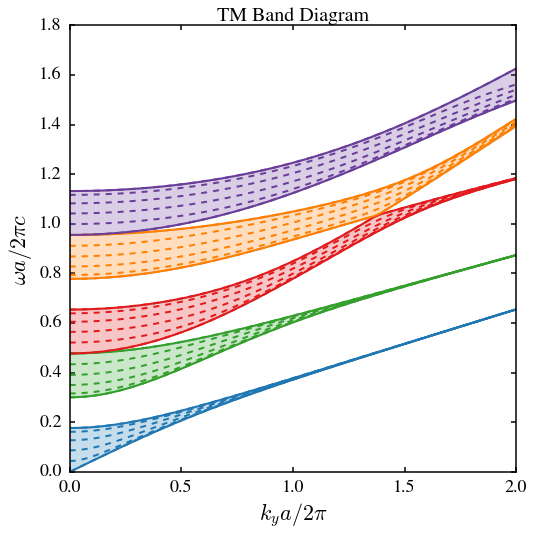

In [47]:
fig,ax = plt.subplots()

# plot each omega vs ky relationship for each value of kx
for i in range(NUM_KX+1):
    ax.plot(kys[i],omegas[i], '--');
    ax.set_prop_cycle(None);
    
# plot kx=0 and kx=0.5 with solid lines 
# to validate that extrema of each band 
# always lie at these kx
for i in [0,-1]:
    ax.plot(kys[i], omegas[i], '-');
    ax.set_prop_cycle(None);
    
# fill in (interpolate) between these two limiting bands
for j in range(1,NUM_BANDS+1):
    ax.fill_between(kys[0], omegas[0]["tm band %d" %j], omegas[-1]["tm band %d" %j], 
                    facecolor=c11s[j-1], alpha=0.25);

ax.set_title("TM Band Diagram", fontsize=20);
ax.set_xlabel("$k_y a / 2\pi$");
ax.set_ylabel("$\omega a/ 2\pi c$");

---

## Problem 2b

In [94]:
%%sh
cd 2b
mpb deps2=4 N=22 kx=0 defect1d.ctl | grep tmfreqs > tm.defects.kx0.dat
cd ..

In [95]:
NUM_BANDS_b = 80

In [96]:
bands_b = pd.read_csv('./2b/tm.defects.kx0.dat', index_col=[0,1], skipinitialspace=True).loc["tmfreqs:"]
ky_b = bands_b["k2"].values
omega_b = bands_b[["tm band %d" % i for i in range(1,NUM_BANDS_b+1)]]

In [178]:
omega_b.loc[50]

tm band 1     0.344621
tm band 2     0.356312
tm band 3     0.363233
tm band 4     0.363343
tm band 5     0.363516
tm band 6     0.363769
tm band 7     0.364059
tm band 8     0.364437
tm band 9     0.364818
tm band 10    0.365730
tm band 11    0.365287
tm band 12    0.366250
tm band 13    0.366718
tm band 14    0.367241
tm band 15    0.367694
tm band 16    0.368172
tm band 17    0.368571
tm band 18    0.368959
tm band 19    0.369267
tm band 20    0.369531
tm band 21    0.369714
tm band 22    0.369830
tm band 23    0.463109
tm band 24    0.548217
tm band 25    0.593352
tm band 26    0.593791
tm band 27    0.594429
tm band 28    0.595480
tm band 29    0.596521
tm band 30    0.599507
                ...   
tm band 51    0.768649
tm band 52    0.775057
tm band 53    0.776507
tm band 54    0.783195
tm band 55    0.784494
tm band 56    0.792526
tm band 57    0.793699
tm band 58    0.802527
tm band 59    0.803698
tm band 60    0.813984
tm band 61    0.812643
tm band 62    0.822205
tm band 63 

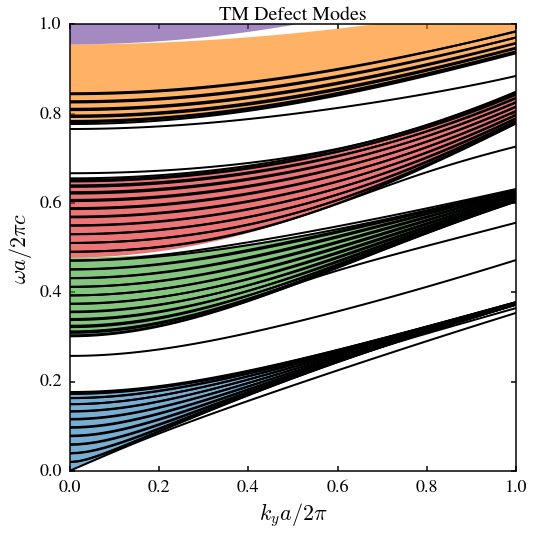

In [173]:
fig,ax = plt.subplots()

# plot defect bands
for i in range(1,NUM_BANDS_b):
    ax.plot(ky_b, omega_b["tm band %d" % i], 'k-', zorder=5);

# fill in (interpolate) between the two limiting bands
for j in range(1,NUM_BANDS+1):
    ax.fill_between(kys[0], omegas[0]["tm band %d" %j], omegas[-1]["tm band %d" %j],
                    facecolor=c11s[j-1],lw=0, alpha=0.6, zorder=2);

    


ax.set_title("TM Defect Modes", fontsize=20);
ax.set_xlabel("$k_y a / 2\pi$");
ax.set_ylabel("$\omega a/ 2\pi c$");

    
ax.set_xlim(0,1);
ax.set_ylim(0,1);

In [99]:
!ls 2b

defect1d-e.k01.b01.z.tm.h5  defect1d-e.k49.b03.z.tm.h5
defect1d-e.k01.b02.z.tm.h5  defect1d-e.k49.b04.z.tm.h5
defect1d-e.k01.b03.z.tm.h5  defect1d-e.k49.b05.z.tm.h5
defect1d-e.k01.b04.z.tm.h5  defect1d-e.k49.b06.z.tm.h5
defect1d-e.k01.b05.z.tm.h5  defect1d-e.k49.b07.z.tm.h5
defect1d-e.k01.b06.z.tm.h5  defect1d-e.k49.b08.z.tm.h5
defect1d-e.k01.b07.z.tm.h5  defect1d-e.k49.b09.z.tm.h5
defect1d-e.k01.b08.z.tm.h5  defect1d-e.k49.b10.z.tm.h5
defect1d-e.k01.b09.z.tm.h5  defect1d-e.k49.b11.z.tm.h5
defect1d-e.k01.b10.z.tm.h5  defect1d-e.k49.b12.z.tm.h5
defect1d-e.k01.b11.z.tm.h5  defect1d-e.k49.b13.z.tm.h5
defect1d-e.k01.b12.z.tm.h5  defect1d-e.k49.b14.z.tm.h5
defect1d-e.k01.b13.z.tm.h5  defect1d-e.k49.b15.z.tm.h5
defect1d-e.k01.b14.z.tm.h5  defect1d-e.k49.b16.z.tm.h5
defect1d-e.k01.b15.z.tm.h5  defect1d-e.k49.b17.z.tm.h5
defect1d-e.k01.b16.z.tm.h5  defect1d-e.k49.b18.z.tm.h5
defect1d-e.k01.b17.z.tm.h5  defect1d-e.k49.b19.z.tm.h5
defect1d-e.k01.b18.z.tm.h5  defect1d-e.k49.b20.z.tm.h5
defect1d-e

In [179]:
BANDS = [1, 23, 24]

eps_file = h5py.File('./2b/defect1d-epsilon.h5')
field_data_1 = h5py.File('./2b/defect1d-e.k50.b%02d.z.tm.h5' % BANDS[0]) 
field_data_2 = h5py.File('./2b/defect1d-e.k50.b%02d.z.tm.h5' % BANDS[1])
field_data_3 = h5py.File('./2b/defect1d-e.k50.b%02d.z.tm.h5' % BANDS[2])

epsilon = eps_file["data"].value
E1 = field_data_1["z.r"].value
E2 = field_data_2["z.r"].value
E3 = field_data_3["z.r"].value
nX = E1.shape[0]
X_size = field_data_1["lattice vectors"].value[0,0]
X = np.linspace(-X_size/2,X_size/2, nX)

In [180]:
print(epsilon.min(), epsilon.max())

2.25 12.0


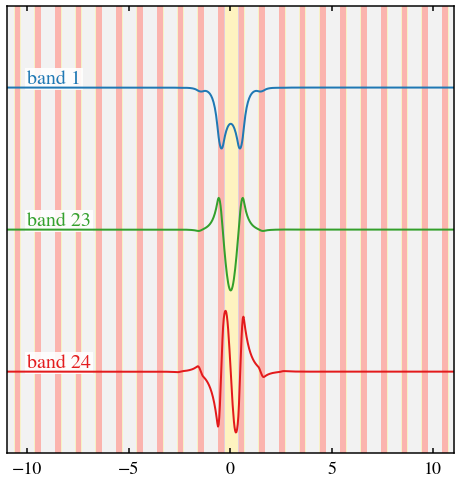

In [206]:
fig,ax = plt.subplots()

eps_im = np.repeat(epsilon[:,np.newaxis],nX,axis=1).T
ax.imshow(eps_im, 
          cmap=plt.cm.Pastel1_r,
          extent=(-X_size/2, X_size/2, -X_size/2, X_size/2), zorder=-3)
ax.set_autoscale_on(False)

# ax.colorbar()
l1, = ax.plot(X,3*E1/np.abs(E1).max() + 7)
l2, = ax.plot(X,3*E2/np.abs(E2).max())
l3, = ax.plot(X,3*E3/np.abs(E3).max() - 7)


textbox={'facecolor':'white', 'edgecolor':'none', 'alpha':0.9, 'pad':2}

ax.text(-10, 7.2, "band %d" % BANDS[0], fontsize=20, color=l1.get_c(),  bbox=textbox, zorder=-1)
ax.text(-10, 7.2-7, "band %d" % BANDS[1], fontsize=20, color=l2.get_c(), bbox=textbox, zorder=-1)
ax.text(-10, 7.2-2*7, "band %d" % BANDS[2], fontsize=20, color=l3.get_c(), bbox=textbox, zorder=-1)


ax.yaxis.set_visible(False)


# plot epsilon and E-field for two lowest-order guided modes